
Análisis descriptivo completo de la velocidad:
count    144000.000000
mean         -0.645311
std         167.649929
min       -2541.654297
25%         -75.290560
50%          -1.160730
75%          72.587248
max        1824.427368
Name: velocity(c/s), dtype: float64

Velocidad mínima: -2541.654296875
Velocidad máxima: 1824.4273681640625

Días donde se detectaron eventos sísmicos o anomalías:
Se detectaron eventos sísmicos el día: 2022-01-02
Se detectaron eventos sísmicos el día: 2022-02-03


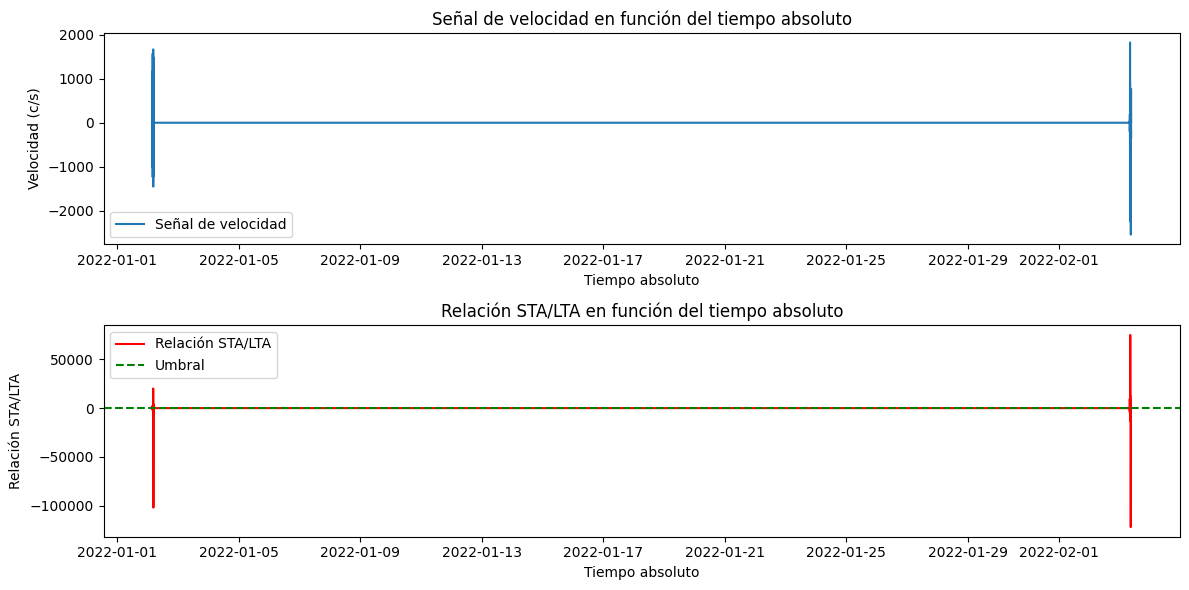

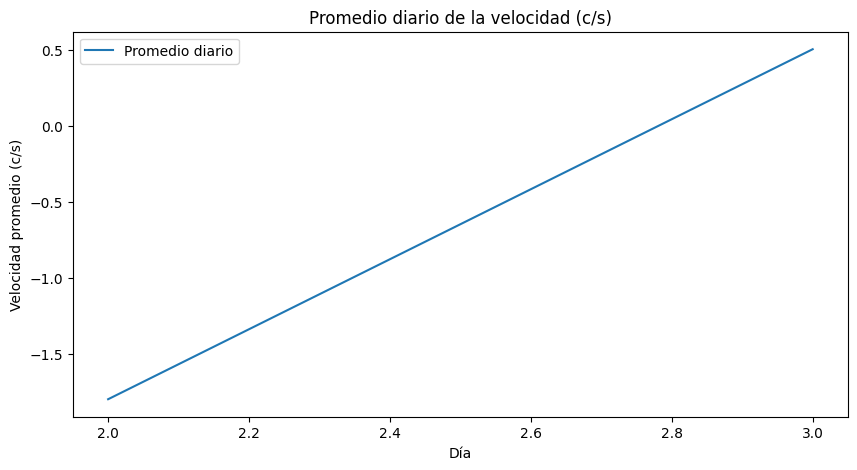

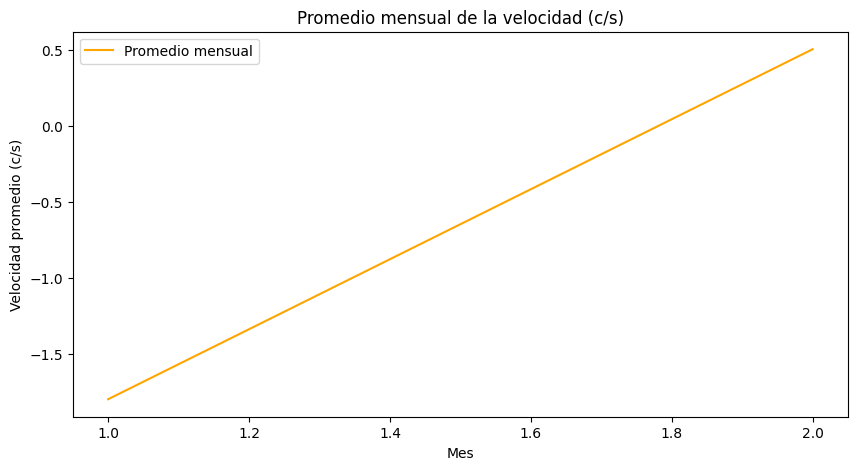

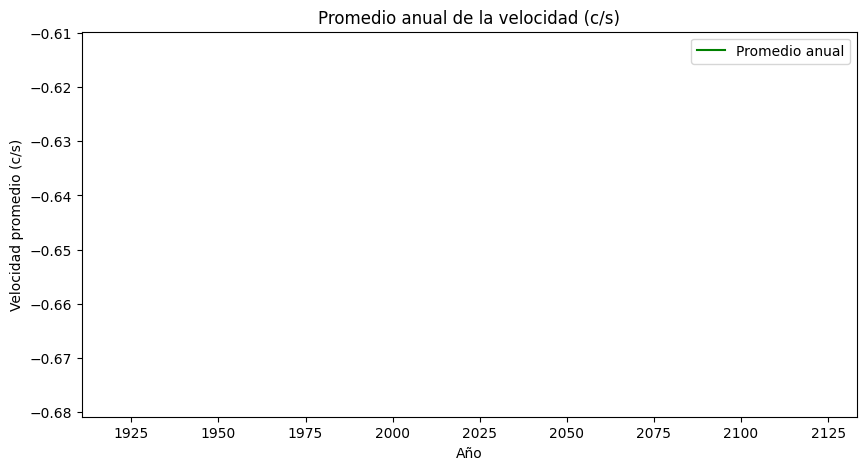

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la carpeta que contiene los archivos CSV
folder_path = r'C:\Users\Miguel Angel\Desktop\spaceapp\space_apps_2024_seismic_detection\data\mars\training\data'

# Leer y combinar todos los archivos CSV en un DataFrame
dataframes = []

# Recorrer cada archivo CSV en la carpeta
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, usecols=['time(%Y-%m-%dT%H:%M:%S.%f)', 'velocity(c/s)'])
        dataframes.append(df)

# Combinar todos los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)

# Ordenar los datos por tiempo absoluto
df = df.sort_values('time(%Y-%m-%dT%H:%M:%S.%f)')

# Convertir la columna de tiempo absoluto a formato de fecha y hora
df['time(%Y-%m-%dT%H:%M:%S.%f)'] = pd.to_datetime(df['time(%Y-%m-%dT%H:%M:%S.%f)'])

# Análisis descriptivo de la velocidad
velocity_stats = df['velocity(c/s)'].describe()

print("\nAnálisis descriptivo completo de la velocidad:")
print(velocity_stats)

# Extraer valores mínimos y máximos de la velocidad
velocity_min = df['velocity(c/s)'].min()
velocity_max = df['velocity(c/s)'].max()

print(f"\nVelocidad mínima: {velocity_min}")
print(f"Velocidad máxima: {velocity_max}")

# Parámetros para el cálculo de STA/LTA
sampling_rate = 6  # Número de muestras por segundo
sta_window = 1 * sampling_rate  # Ventana corta de 1 segundo
lta_window = 10 * sampling_rate  # Ventana larga de 10 segundos

# Calcular la media móvil (STA y LTA)
sta = df['velocity(c/s)'].rolling(window=sta_window).mean()
lta = df['velocity(c/s)'].rolling(window=lta_window).mean()

# Evitar división por cero en la LTA reemplazando ceros por NaN
lta = lta.replace(0, np.nan)

# Relación STA/LTA
sta_lta_ratio = sta / lta

# Establecer un umbral para detectar eventos sísmicos
threshold = 3  # Este umbral puede ajustarse según sea necesario
event_detection = sta_lta_ratio > threshold

# Extraer los tiempos donde se detectaron eventos sísmicos
event_times = df['time(%Y-%m-%dT%H:%M:%S.%f)'][event_detection]

# Agrupar los eventos sísmicos por día
event_days = event_times.dt.date.unique()

# Mostrar las fechas en las que se detectaron eventos sísmicos
print("\nDías donde se detectaron eventos sísmicos o anomalías:")
for day in event_days:
    print(f"Se detectaron eventos sísmicos el día: {day}")

# ------------------------------------------------------------
# Graficar la señal de velocidad y la relación STA/LTA en función del tiempo absoluto
# ------------------------------------------------------------
plt.figure(figsize=(12, 6))

# Gráfico de la señal de velocidad
plt.subplot(2, 1, 1)
plt.plot(df['time(%Y-%m-%dT%H:%M:%S.%f)'], df['velocity(c/s)'], label="Señal de velocidad")
plt.title("Señal de velocidad en función del tiempo absoluto")
plt.xlabel("Tiempo absoluto")
plt.ylabel("Velocidad (c/s)")
plt.legend()

# Gráfico de la relación STA/LTA
plt.subplot(2, 1, 2)
plt.plot(df['time(%Y-%m-%dT%H:%M:%S.%f)'], sta_lta_ratio, label="Relación STA/LTA", color='red')
plt.axhline(y=threshold, color='green', linestyle='--', label="Umbral")
plt.title("Relación STA/LTA en función del tiempo absoluto")
plt.xlabel("Tiempo absoluto")
plt.ylabel("Relación STA/LTA")
plt.legend()

plt.tight_layout()
plt.show()

# Extraer columnas de día, mes y año
df['year'] = df['time(%Y-%m-%dT%H:%M:%S.%f)'].dt.year
df['month'] = df['time(%Y-%m-%dT%H:%M:%S.%f)'].dt.month
df['day'] = df['time(%Y-%m-%dT%H:%M:%S.%f)'].dt.day

# Promedio de velocidad por día
daily_avg = df.groupby('day')['velocity(c/s)'].mean()
plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg.values, label='Promedio diario')
plt.title("Promedio diario de la velocidad (c/s)")
plt.xlabel("Día")
plt.ylabel("Velocidad promedio (c/s)")
plt.legend()
plt.show()

# Promedio de velocidad por mes
monthly_avg = df.groupby('month')['velocity(c/s)'].mean()
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, label='Promedio mensual', color='orange')
plt.title("Promedio mensual de la velocidad (c/s)")
plt.xlabel("Mes")
plt.ylabel("Velocidad promedio (c/s)")
plt.legend()
plt.show()

# Promedio de velocidad por año
yearly_avg = df.groupby('year')['velocity(c/s)'].mean()
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, label='Promedio anual', color='green')
plt.title("Promedio anual de la velocidad (c/s)")
plt.xlabel("Año")
plt.ylabel("Velocidad promedio (c/s)")
plt.legend()
plt.show()
